# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
metric = "metric"
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={metric}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

# Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | makurdi
Processing Record 2 of Set 1 | taiohae
City not found. Skipping...
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | pangody
Processing Record 5 of Set 1 | bokoro
Processing Record 6 of Set 1 | yeniseysk
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | yanbu
Processing Record 10 of Set 1 | vilyuchinsk
Processing Record 11 of Set 1 | hadibu
Processing Record 12 of Set 1 | recani
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | whitehorse
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | bani walid
Processing Record 17 of Set 1 | stanley
Processing Record 18 of Set 1 | kodiak
Processing Record 19 of Set 1 | taltal
Processing Record 20 of Set 1 | burang
Processing Record 21 of Set 1 | axim
Processing Record 22 of Set 1 | hotan
Process

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,makurdi,7.7411,8.5121,22.92,91,32,0.48,NG,1718146368
1,port-aux-francais,-49.3500,70.2167,1.68,65,89,17.10,TF,1718146368
2,pangody,65.8500,74.4859,9.00,78,67,3.80,RU,1718146369
3,bokoro,12.3807,17.0568,30.33,51,94,3.33,TD,1718146369
4,yeniseysk,58.4497,92.1703,13.30,79,17,1.34,RU,1718146369


In [6]:
#Date cleaning
city_data_df['Date']=(pd.to_datetime(city_data_df['Date'],unit='s')).dt.date
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,makurdi,7.7411,8.5121,22.92,91,32,0.48,NG,2024-06-11
1,port-aux-francais,-49.3500,70.2167,1.68,65,89,17.10,TF,2024-06-11
2,pangody,65.8500,74.4859,9.00,78,67,3.80,RU,2024-06-11
3,bokoro,12.3807,17.0568,30.33,51,94,3.33,TD,2024-06-11
4,yeniseysk,58.4497,92.1703,13.30,79,17,1.34,RU,2024-06-11


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../cities1.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../cities1.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,makurdi,7.7411,8.5121,22.92,91,32,0.48,NG,2024-06-11
1,port-aux-francais,-49.3500,70.2167,1.68,65,89,17.10,TF,2024-06-11
2,pangody,65.8500,74.4859,9.00,78,67,3.80,RU,2024-06-11
3,bokoro,12.3807,17.0568,30.33,51,94,3.33,TD,2024-06-11
4,yeniseysk,58.4497,92.1703,13.30,79,17,1.34,RU,2024-06-11


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

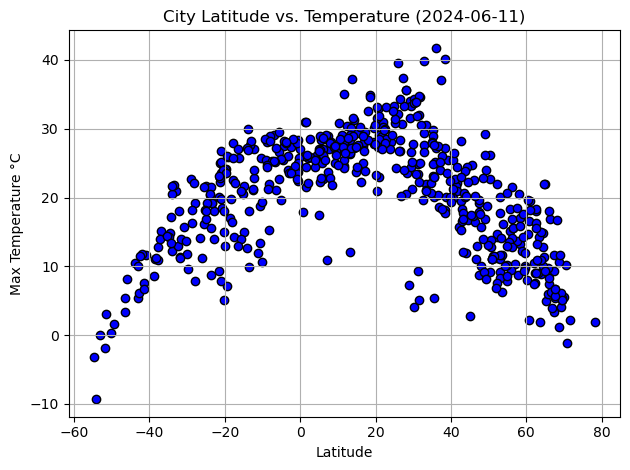

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', 
            facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature °C")
date=city_data_df['Date'].min()
plt.title(f"City Latitude vs. Temperature ({date})")
plt.tight_layout()

# Save the figure
plt.savefig("../Figure1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

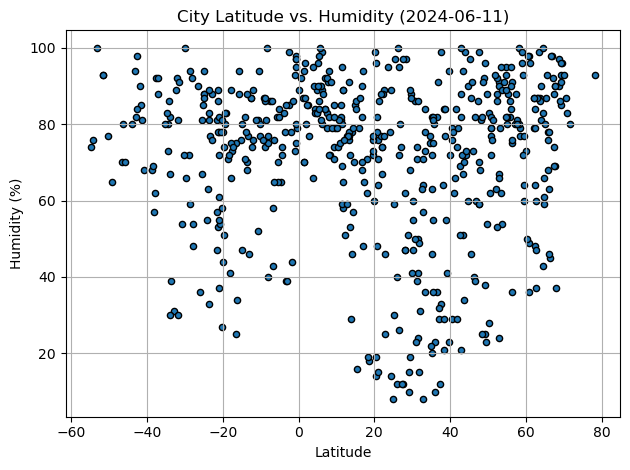

In [10]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', 
                  marker='o', grid=True,
                  facecolors='b', edgecolors='k', 
                  title=f'City Latitude vs. Humidity ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()


# Save the figure
plt.savefig("../Figure2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

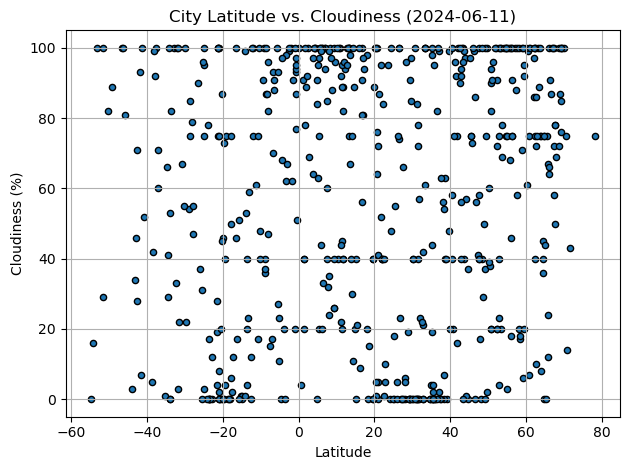

In [11]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', 
                  marker='o', grid=True,
                  facecolors='b', edgecolors='k', 
                  title=f'City Latitude vs. Cloudiness ({date})')


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.tight_layout()

# Save the figure
plt.savefig("../Figure3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

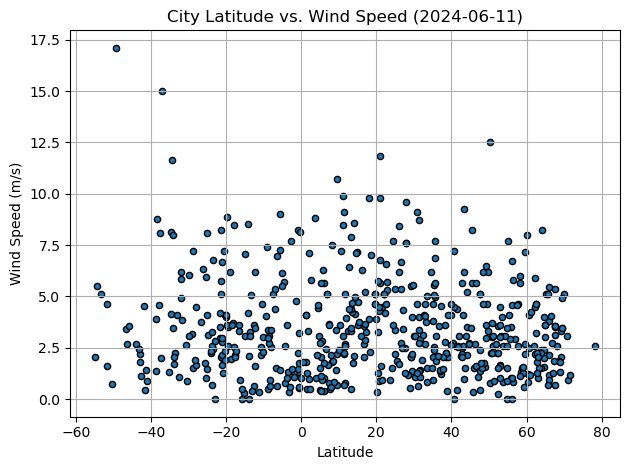

In [12]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', 
                  marker='o', grid=True,
                  facecolors='b', edgecolors='k', 
                  title=f'City Latitude vs. Wind Speed ({date})')


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.tight_layout()

# Save the figure
plt.savefig("../Figure4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [28]:
# Define a function to create Linear Regression plots
def linear_regression(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress = x * slope + intercept
    line_eq = (f"y = {round(slope,2)}x + {round(intercept,2)}")
    print(f"The r-value is: {rvalue}")
    plt.scatter(x, y, c="blue", marker="X", edgecolor="black", linewidths=0.5)
    plt.plot(x,regress,"r")
    plt.annotate(line_eq,(x.min(),y.min()),color="r",fontsize=12)
    plt.tight_layout()

In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,makurdi,7.7411,8.5121,22.92,91,32,0.48,NG,2024-06-11
2,pangody,65.8500,74.4859,9.00,78,67,3.80,RU,2024-06-11
3,bokoro,12.3807,17.0568,30.33,51,94,3.33,TD,2024-06-11
4,yeniseysk,58.4497,92.1703,13.30,79,17,1.34,RU,2024-06-11
7,yanbu,24.0891,38.0637,28.02,78,0,1.54,SA,2024-06-11


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<= 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,1.68,65,89,17.10,TF,2024-06-11
5,grytviken,-54.2811,-36.5092,-9.32,76,16,5.53,GS,2024-06-11
6,waitangi,-43.9535,-176.5597,10.46,80,3,2.68,NZ,2024-06-11
11,adamstown,-25.0660,-130.1015,21.62,88,95,8.09,PN,2024-06-11
13,edinburgh of the seven seas,-37.0676,-12.3116,15.10,88,71,15.00,SH,2024-06-11


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7314380933524003


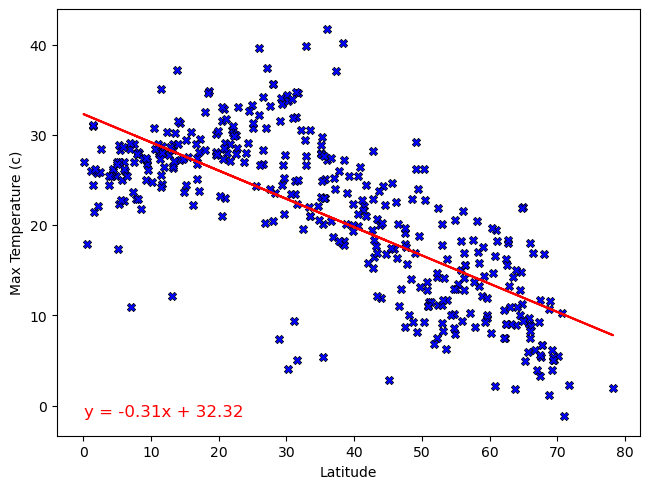

In [32]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")
plt.show()

The r-value is: 0.7809158871126937


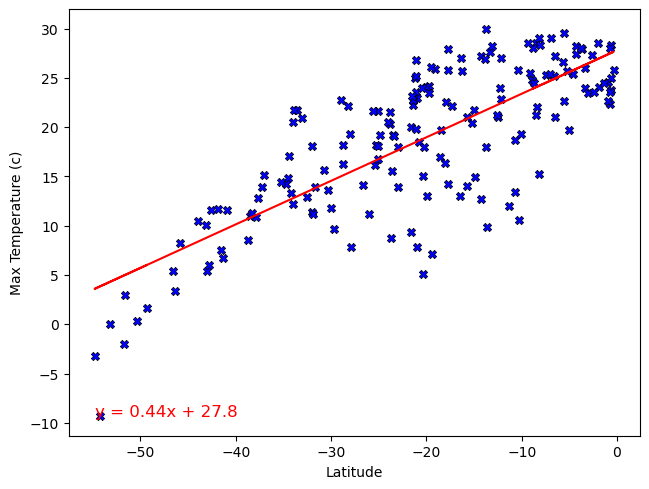

In [33]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")
plt.show()

**Discussion about the linear relationship:** From the visuals, the data shows the temperature decreases as you move away from the equator. The correlation between the latitude and the temperature is fairly strong with a slightly stronger correlation in the southern hemisphere. Additionally, there is a positive correlation in the south, while the north is positive.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.030795599032579647


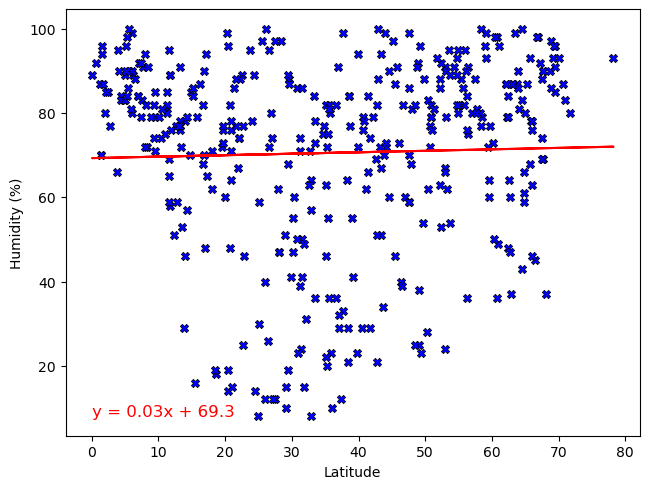

In [34]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

# plot titles
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

The r-value is: -0.020990484495301852


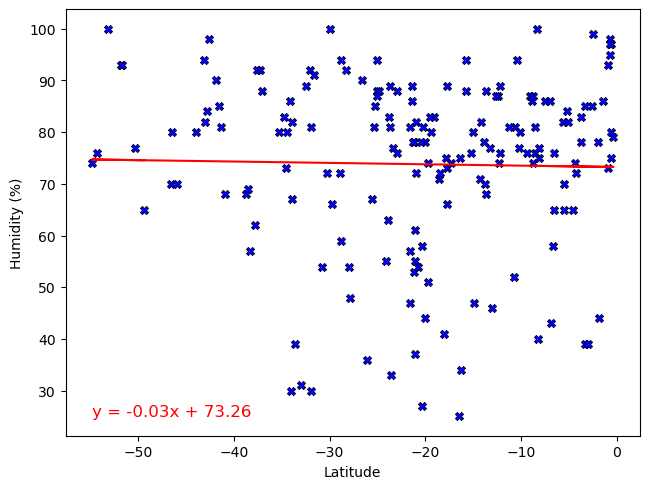

In [35]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])

# plot titles
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

**Discussion about the linear relationship:** There is little to no correlation between latitude and the location's humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.05525215769264763


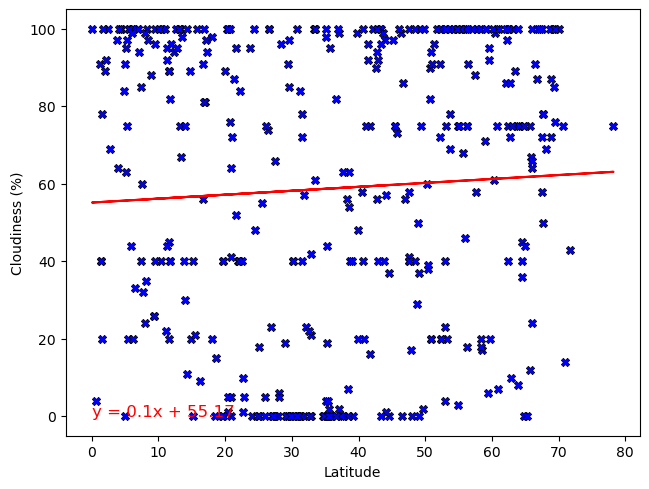

In [36]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

# plot titles
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

The r-value is: 0.05564652908536438


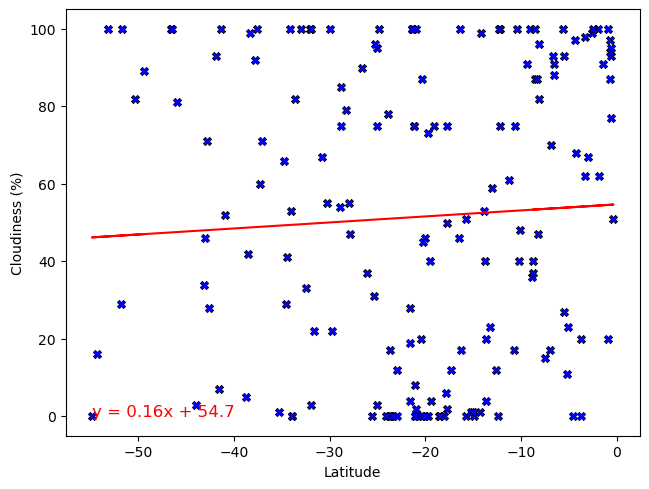

In [37]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

# plot titles
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

**Discussion about the linear relationship:** Again, there is little to no correlation between the cloudiness and a location's latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.12432044606439231


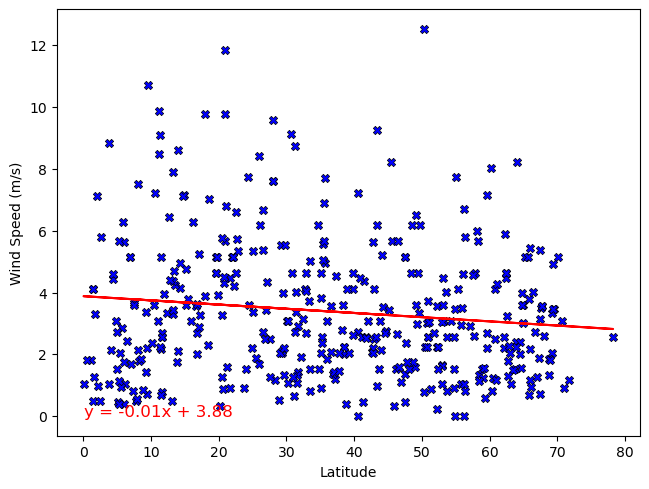

In [38]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

The r-value is: -0.13312864217989778


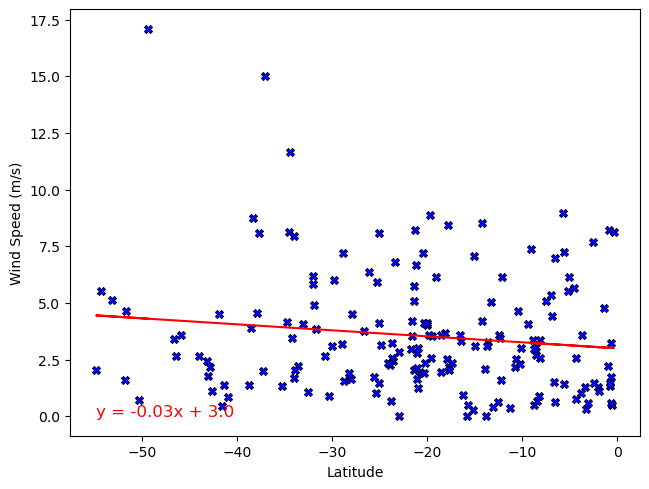

In [39]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

**Discussion about the linear relationship:** The correlation between the wind speed and a location's latitude is weak; however, the data reveals that wind speeds are consistently low in most locations.